In [1]:
#loading data
import pynbody
import pylab
s=pynbody.load('/Users/mac/Desktop/testdata/g15784.lr.01024.gz')

In [2]:
#loading halos
h=s.halos()

In [3]:
#storing halo
h1=h[1]

In [4]:
#checking number of particles in each type
print('ngas = %e, ndark = %e, nstar = %e\n'%(len(h1.gas),len(h1.dark),len(h1.star)))

ngas = 7.906000e+04, ndark = 1.610620e+05, nstar = 2.621780e+05



In [5]:
#centering data
pynbody.analysis.halo.center(h1,mode='hyb')

In [6]:
#centering contents of halo 5
print(h[1]['pos'][0])

[-0.00091396 -0.00044043 -0.00365958]


In [7]:
#centering contents of halo 5
print(h[5]['pos'][0])

[-0.00092652  0.00130131 -0.00042332]


In [8]:
#centering contents of halo 5
h5=h[5]

In [9]:
#centering contents of halo 5
my_h5_transform = pynbody.analysis.halo.center(h5, mode='hyb', move_all=False)

In [10]:
#centering contents of halo 5
print(h[1]['pos'][0]) #unchanged as before

[-0.00091396 -0.00044043 -0.00365958]


In [11]:
#centering contents of halo 5
print(h5['pos'][0]) #changed as before

[7.37221446e-05 8.42725399e-05 1.28729490e-04]


In [12]:
#transformation that allows undo
my_h5_transform.revert()

In [13]:
#reverted to original
print(h5['pos'][0])

[-0.00092652  0.00130131 -0.00042332]


In [14]:
#still same as before
print(h[1]['pos'][0])

[-0.00091396 -0.00044043 -0.00365958]


In [15]:
#more effective way to transform
with pynbody.analysis.halo.center(h[5], mode='hyb'): print(h[5]['pos'][0])

[7.37221446e-05 8.42725399e-05 1.28729490e-04]


In [16]:
#reverts like before
print(h[5]['pos'][0])

[-0.00092652  0.00130131 -0.00042332]


In [17]:
#making sure center coordinates pynbody finds are reasonable
s = pynbody.load('/Users/mac/Desktop/testdata/g15784.lr.01024.gz'); h1 = s.halos()[1];
cen_hyb = pynbody.analysis.halo.center(h1,mode='hyb',retcen=True)
cen_pot = pynbody.analysis.halo.center(h1,mode='pot',retcen=True)
print(cen_hyb)

[ 0.02445621 -0.03411364 -0.12243623]


In [18]:
#making sure center coordinates pynbody finds are reasonable
print(cen_pot)

[ 0.02445719 -0.03411397 -0.12243643]


In [19]:
#cen_hyb was better so keeping it
s['pos'] -= cen_hyb

In [20]:
#converting to physical units
s.physical_units()

SimArray([[10263.51 , 10323.97 , 10384.43 , ..., 10334.826, 10254.129,
           10173.432],
          [10342.602, 10403.28 , 10463.959, ..., 10356.803, 10276.174,
           10195.545],
          [10421.694, 10482.592, 10543.489, ..., 10378.779, 10298.219,
           10217.658],
          ...,
          [ 9527.131,  9636.183,  9745.233, ...,  9798.586,  9780.065,
            9761.546],
          [ 9500.557,  9605.702,  9710.848, ...,  9792.067,  9774.049,
            9756.029],
          [ 9473.982,  9575.222,  9676.461, ...,  9785.549,  9768.031,
            9750.514]], dtype=float32, 'Msol kpc**-3')

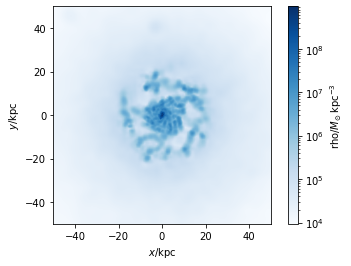

In [21]:
#display plot
pynbody.plot.image(h1.g, width=100, cmap='Blues')

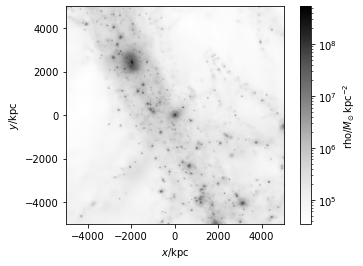

In [22]:
#larger scale dark matter distribution
pynbody.plot.image(s.d[pynbody.filt.Sphere('10 Mpc')], width='10 Mpc', units = 'Msol kpc^-2', cmap='Greys');

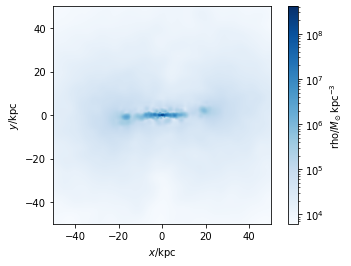

In [23]:
#aligning edge-on
pynbody.analysis.angmom.sideon(h1, cen=(0,0,0))
pynbody.plot.image(h1.g, width=100, cmap='Blues');

In [24]:
#rotating face-on
s.rotate_x(90)

/Users/mac/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


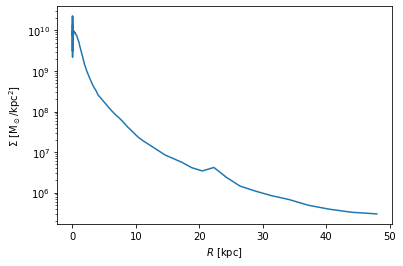

In [32]:
#star profile using face-on orientation
ps = pynbody.analysis.profile.Profile(h1.s, min = 0.01, max = 50, type = 'log')
pylab.clf()
pylab.plot(ps['rbins'], ps['density']);
pylab.semilogy();
pylab.xlabel('$R$ [kpc]');
pylab.ylabel('$\Sigma$ [M$_\odot$/kpc$^2$]');

In [33]:
#generating rotation curve profile
pylab.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [34]:
pd = pynbody.analysis.profile.Profile(h1.d,min=.01,max=50, type = 'log')

/Users/mac/anaconda3/lib/python3.8/site-packages/pynbody/array.py:865: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.base[self._reexpress_index(item)]


In [35]:
pg = pynbody.analysis.profile.Profile(h1.g,min=.01,max=50, type = 'log')

In [36]:
p = pynbody.analysis.profile.Profile(h1,min=.01,max=50, type = 'log')

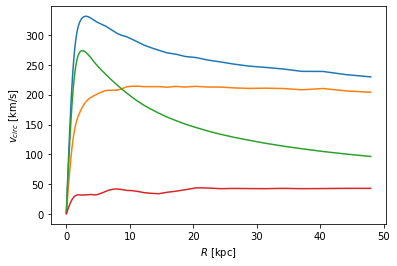

In [43]:
for prof, name in zip([p,pd,ps,pg],['total','dm','stars','gas']) : pylab.plot(prof['rbins'],prof['v_circ'],label=name)
pylab.xlabel('$R$ [kpc]');
pylab.ylabel('$v_{circ}$ [km/s]');